# Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Data

In [2]:
df = pd.read_csv('../datasets/Barcamp Bangkhen 2023 Participant Registration (Responses) - Form Responses 1.csv')

# Data Cleaning & EDA 

In [3]:
df.columns

Index(['Timestamp', 'Email Address', 'ชื่อจริง (Firstname)',
       'นามสกุล (Lastname)', 'อาชีพ (Career)',
       'องค์กรที่สังกัด (Organization)',
       'ประวัติการแพ้อาหาร และอาหารตามความเชื่อหรือศาสนา (Food allergy/religious or ethical preferences)',
       'Size เสื้อโดยประมาณ (Approximate  Shirt Size )\n**เฉพาะผู้ที่ลงทะเบียน 200 คนแรก(จำนวนอาจมีการเปลี่ยนแปลง) จะได้รับเสื้อยืด T-shirt Barcamp Bangkhen 2023\n**Only the first 200 registrants(The amount may change) will receive a free Barcamp Bangkhen 2023 T-shirt.',
       'ความสนใจ (Interests) (comma-serperated)',
       'ความยินยอมในการใช้ข้อมูล (Consent for the use of information)'],
      dtype='object')

In [4]:
df = df.drop(columns=['Email Address', 'ชื่อจริง (Firstname)', 'นามสกุล (Lastname)'])

In [5]:
df.rename(index=str, 
             columns={  'อาชีพ (Career)': "career", 'องค์กรที่สังกัด (Organization)': "organization", 
                        'ประวัติการแพ้อาหาร และอาหารตามความเชื่อหรือศาสนา (Food allergy/religious or ethical preferences)' : "food", 
                        "Size เสื้อโดยประมาณ (Approximate  Shirt Size )\n**เฉพาะผู้ที่ลงทะเบียน 200 คนแรก(จำนวนอาจมีการเปลี่ยนแปลง) จะได้รับเสื้อยืด T-shirt Barcamp Bangkhen 2023\n**Only the first 200 registrants(The amount may change) will receive a free Barcamp Bangkhen 2023 T-shirt.": "size", 
                        'ความสนใจ (Interests) (comma-serperated)': "interest", 
                        'ความยินยอมในการใช้ข้อมูล (Consent for the use of information)': "consent" }, inplace=True)

In [6]:
df.head()

,Timestamp,career,organization,food,size,interest,consent
0,1/16/2023 19:29:00,เจ้าหน้าที่ของรัฐ,NaN,ไม่แพ้อาหารหรือความต้องการด้านอาหารอื่นๆ (Neit...,XL,"Banking, Cloud Computing, Coding, Computer, Ed...",ยินยอม (Consent)
1,1/16/2023 19:30:03,Software Engineer,Witsawa Corporation,ไม่แพ้อาหารหรือความต้องการด้านอาหารอื่นๆ (Neit...,L,"AI, Banking, Big Data, Blockchain, Cloud Compu...",ยินยอม (Consent)
2,1/16/2023 19:30:55,Developer,-,ไม่แพ้อาหารหรือความต้องการด้านอาหารอื่นๆ (Neit...,XL,"AI, Blockchain, Cooking, Cyber Security, Food,...",ยินยอม (Consent)
3,1/16/2023 19:38:45,นักศึกษาปริญญาโท,จุฬาลงกรณ์มหาวิทยาลัย,ไม่แพ้อาหารหรือความต้องการด้านอาหารอื่นๆ (Neit...,L,"AI, Anime, Augmented Reality, Banking, Big Dat...",ยินยอม (Consent)
4,1/16/2023 19:39:38,-,NaN,ไม่แพ้อาหารหรือความต้องการด้านอาหารอื่นๆ (Neit...,XL,"Banking, Cooking",ยินยอม (Consent)


In [7]:
df['interest'].head()

0    Banking, Cloud Computing, Coding, Computer, Ed...
1    AI, Banking, Big Data, Blockchain, Cloud Compu...
2    AI, Blockchain, Cooking, Cyber Security, Food,...
3    AI, Anime, Augmented Reality, Banking, Big Dat...
4                                     Banking, Cooking
Name: interest, dtype: object

In [8]:
interest_dummy = df['interest'].copy()
interest_dummy = interest_dummy.str.strip()
interest_dummy.str.replace(' ,', ',', regex=True)
interest_dummy.str.replace(', ', ',', regex=True)

interest_dummy = pd.concat([interest_dummy.str.get_dummies(sep=",")])
interest_dummy.head()

,...,AI,API services,AR,ASMR,Ads Technology,Agile,Andriod,Anime,Apple Inc.,...,เกม,เทคโน,เทคโนโลยี,เทคโนโลยี การเงิน การขนส่ง,เทคโนโลยี เศรษฐกิจ การเมือง,เพลง,เรื่องผี สังคม ประเทศ,เรื่องเทคโนโลยีอะไรก็ได้,แนะแนวการเรียนต่อ,แน้วโน้มการจ้างงาน
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
interest_dummy = interest_dummy.drop(interest_dummy.columns[[0]],axis = 1)
interest_dummy.head()

,AI,API services,AR,ASMR,Ads Technology,Agile,Andriod,Anime,Apple Inc.,Art,...,เกม,เทคโน,เทคโนโลยี,เทคโนโลยี การเงิน การขนส่ง,เทคโนโลยี เศรษฐกิจ การเมือง,เพลง,เรื่องผี สังคม ประเทศ,เรื่องเทคโนโลยีอะไรก็ได้,แนะแนวการเรียนต่อ,แน้วโน้มการจ้างงาน
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
interest_count = interest_dummy.sum(axis=0).sort_values(ascending=False)
df_interest_count = interest_count.to_frame().reset_index()
df_interest_count

,index,0
0,AI,48
1,Computer,40
2,Coding,37
3,Technology,36
4,Big Data,29
...,...,...
291,การเงิน,1
292,คลิปเล่าเรื่อง (FM Diary),1
293,ความรู้เกี่ยวกับด้าน IT,1
294,ความรู้เกี่ยวับด้าน Design และอื่น ๆ ที่เกี่ย...,1


Text(0, 0.5, 'Topics')

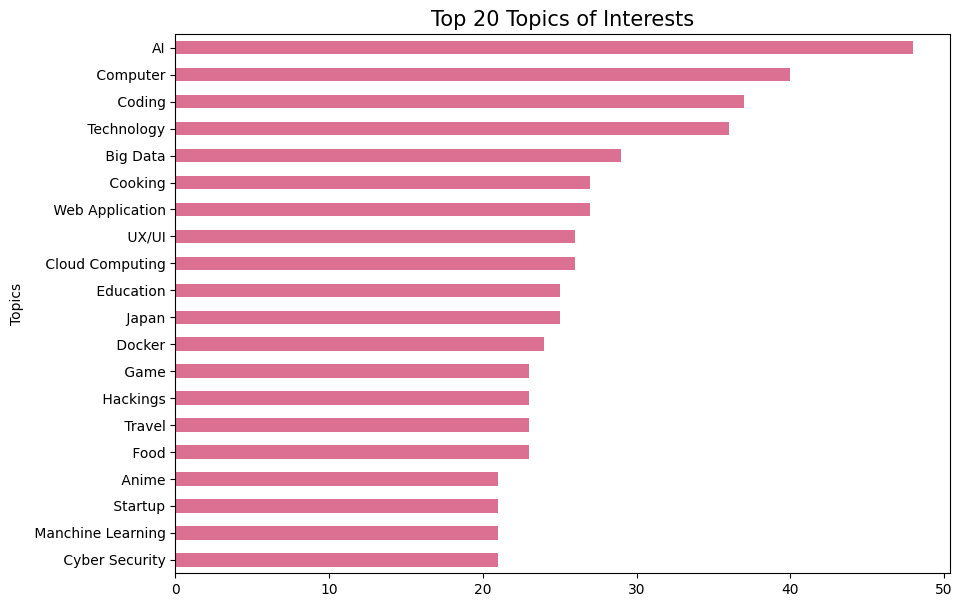

In [11]:
plt.figure(figsize=(10,7))
interest_count[:20].plot(kind='barh', color='palevioletred')
plt.gca().invert_yaxis()
plt.title('Top 20 Topics of Interests', fontsize=15)
plt.ylabel('Topics')

# Save clean data to CSV

In [12]:
# df_interest_count.to_csv('interest-cleaned.csv', index=False)
# interest_dummy.to_csv('interest-dummy.csv', index=False)